#  Использование предобученных моделей для классификации изображений

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/vision/0.16/transforms.html#v2-api-reference-recommended
* https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
* https://pytorch.org/vision/stable/models.html
* https://albumentations.ai/docs/getting_started/image_augmentation/

## Задачи для совместного разбора

1\. Загрузите предобученную модель из `torchvision`. Познакомьтесь с ее архитектурой. Заморозьте веса нескольких слоев.

In [ ]:
import torch
import torchvision.models as models

model = models.resnet18(pretrained=True)

print(model)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 127MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
for param in model.parameters():
    param.requires_grad = False

for param in model.fc.parameters():
    param.requires_grad = True

for name, param in model.named_parameters():
    print(f"{name}: requires_grad = {param.requires_grad}")

conv1.weight: requires_grad = False
bn1.weight: requires_grad = False
bn1.bias: requires_grad = False
layer1.0.conv1.weight: requires_grad = False
layer1.0.bn1.weight: requires_grad = False
layer1.0.bn1.bias: requires_grad = False
layer1.0.conv2.weight: requires_grad = False
layer1.0.bn2.weight: requires_grad = False
layer1.0.bn2.bias: requires_grad = False
layer1.1.conv1.weight: requires_grad = False
layer1.1.bn1.weight: requires_grad = False
layer1.1.bn1.bias: requires_grad = False
layer1.1.conv2.weight: requires_grad = False
layer1.1.bn2.weight: requires_grad = False
layer1.1.bn2.bias: requires_grad = False
layer2.0.conv1.weight: requires_grad = False
layer2.0.bn1.weight: requires_grad = False
layer2.0.bn1.bias: requires_grad = False
layer2.0.conv2.weight: requires_grad = False
layer2.0.bn2.weight: requires_grad = False
layer2.0.bn2.bias: requires_grad = False
layer2.0.downsample.0.weight: requires_grad = False
layer2.0.downsample.1.weight: requires_grad = False
layer2.0.downsample.

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Используя реализацию из `torchvision`, cоздайте модель `vgg16` и загрузите предобученные веса `IMAGENET1K_V1`. Выведите на экран структуру модели, количество слоев и количество настраиваемых (`requires_grad==True`) параметров модели.

- [ ] Проверено на семинаре

In [ ]:
import torch
import torchvision.models as models

model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

print(model)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 80.9MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
num_layers = sum(1 for _ in model.modules())
print(f"Количество слоев: {num_layers}")

trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Количество настраиваемых параметров: {trainable_params}")

Количество слоев: 42
Количество настраиваемых параметров: 138357544


<p class="task" id="2"></p>

2\. Создайте датасет `CatBreeds` на основе данных из архива `cat_breeds_4.zip`. Разбейте датасет на обучающее и тестовое множество в соотношении 80 на 20%.

К обучающему датасету примените следующее преобразование: приведите картинки к размеру 256x256, затем обрежьте по центру с размером 224х224, затем переведите изображения в тензор и нормализуйте значения интенсивности пикселей (`mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`).

К тестовому датасету примените преобразование `VGG16_Weights.IMAGENET1K_V1.transforms`.

- [ ] Проверено на семинаре

Общее количество изображений: 4000
Количество изображений в обучающей выборке: 3200
Количество изображений в тестовой выборке: 800


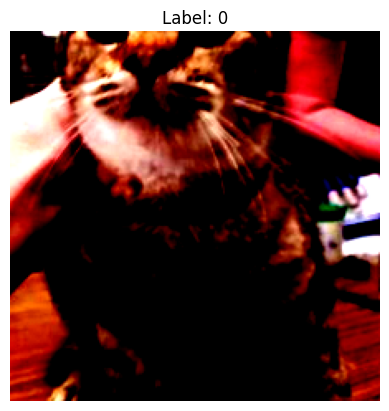

In [1]:
import os
import zipfile
from torchvision import datasets, transforms
from torch.utils.data import random_split
from torchvision.models import VGG16_Weights
import matplotlib.pyplot as plt


archive_path = "cat_breeds_4.zip"
extract_dir = "cat_breeds_4/cat_breeds_4"

if not os.path.exists(extract_dir):
    with zipfile.ZipFile(archive_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)


train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = VGG16_Weights.IMAGENET1K_V1.transforms()


data_dir = extract_dir
full_dataset = datasets.ImageFolder(root=data_dir, transform=None)


train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])


train_dataset.dataset.transform = train_transform
test_dataset.dataset.transform = test_transform


print(f"Общее количество изображений: {len(full_dataset)}")
print(f"Количество изображений в обучающей выборке: {len(train_dataset)}")
print(f"Количество изображений в тестовой выборке: {len(test_dataset)}")


image, label = train_dataset[0]
plt.imshow(image.permute(1, 2, 0))
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

<p class="task" id="3"></p>

3\. Заморозьте все веса модели из предыдущего задания. Замените последний слой `Linear` классификатора на новый слой, соответствующий задаче. После изменения последнего слоя выведите на экран количество настраиваемых (`requires_grad==True`) параметров модели. Решите задачу, используя модель с замороженными весами и изменнным последним слоем.

Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве.

- [ ] Проверено на семинаре

Эпоха [1/10], Loss: 0.6567, Train Acc: 74.19%, Test Acc: 76.25%
Эпоха [2/10], Loss: 0.5459, Train Acc: 78.12%, Test Acc: 79.38%
Эпоха [3/10], Loss: 0.5162, Train Acc: 79.78%, Test Acc: 79.88%
Эпоха [4/10], Loss: 0.4897, Train Acc: 79.53%, Test Acc: 80.50%
Эпоха [5/10], Loss: 0.4963, Train Acc: 80.03%, Test Acc: 79.38%
Эпоха [6/10], Loss: 0.4505, Train Acc: 81.88%, Test Acc: 79.50%
Эпоха [7/10], Loss: 0.4600, Train Acc: 81.09%, Test Acc: 80.50%
Эпоха [8/10], Loss: 0.4731, Train Acc: 80.53%, Test Acc: 80.12%
Эпоха [9/10], Loss: 0.4433, Train Acc: 83.00%, Test Acc: 78.88%
Эпоха [10/10], Loss: 0.4414, Train Acc: 82.09%, Test Acc: 80.12%


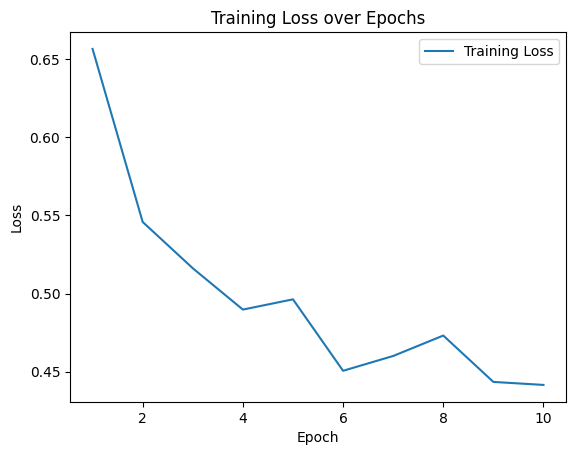

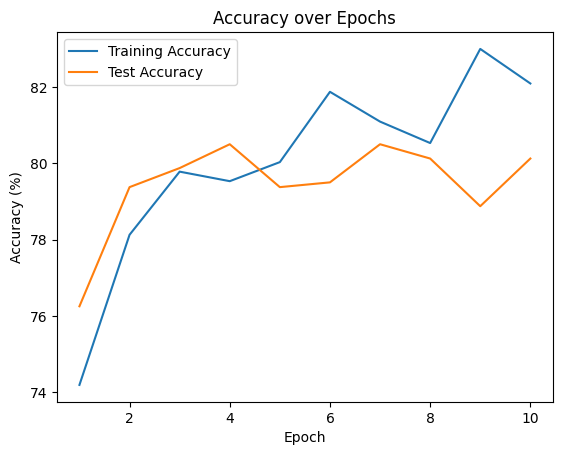

Итоговая точность на обучающем множестве: 82.09%
Итоговая точность на тестовом множестве: 80.12%


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder


model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
for param in model.parameters():
    param.requires_grad = False
num_classes = len(train_dataset.dataset.classes)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier[6].parameters(), lr=0.001)

num_epochs = 10
train_losses, train_accuracies, test_accuracies = [], [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_losses.append(running_loss / len(train_loader))
    train_accuracy = 100 * correct / total
    train_accuracies.append(train_accuracy)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    test_accuracies.append(test_accuracy)

    print(f"Эпоха [{epoch+1}/{num_epochs}], "
          f"Loss: {train_losses[-1]:.4f}, "
          f"Train Acc: {train_accuracy:.2f}%, "
          f"Test Acc: {test_accuracy:.2f}%")


plt.plot(range(1, num_epochs + 1), train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.show()

plt.plot(range(1, num_epochs + 1), train_accuracies, label="Training Accuracy")
plt.plot(range(1, num_epochs + 1), test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()


print(f"Итоговая точность на обучающем множестве: {train_accuracies[-1]:.2f}%")
print(f"Итоговая точность на тестовом множестве: {test_accuracies[-1]:.2f}%")

<p class="task" id="4"></p>

4\. Повторите решение предыдущей задачи, заморозив все сверточные слои, кроме последнего (слои классификатора не замораживайте). Сравните качество полученного решения и решения из предыдущей задачи, а также время, затраченное на обучения моделей. Перед началом работы создайте модель заново.

- [ ] Проверено на семинаре

Эпоха [1/3], Loss: 0.9706, Train Acc: 58.33%, Test Acc: 77.50%
Эпоха [2/3], Loss: 0.5705, Train Acc: 77.71%, Test Acc: 78.33%
Эпоха [3/3], Loss: 0.5095, Train Acc: 82.50%, Test Acc: 79.17%


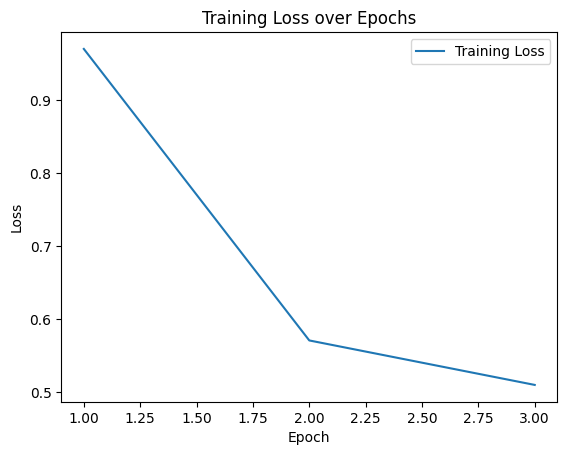

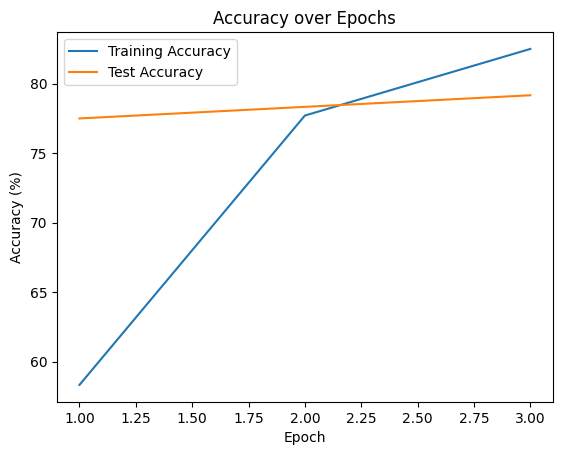

Итоговая точность на обучающем множестве: 82.50%
Итоговая точность на тестовом множестве: 79.17%
Время обучения: 2140.77 секунд


In [ ]:
import os
import random
import time
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from collections import defaultdict
from torchvision import models, transforms, datasets
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split, Subset


dataset_path = "cat_breeds_4/cat_breeds_4/cat_breeds_4"


mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]


transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])


def select_n_per_class(dataset, n):
    class_indices = defaultdict(list)
    for idx, (_, label) in enumerate(dataset):
        class_indices[label].append(idx)

    selected_indices = []
    for label, indices in class_indices.items():
        selected = random.sample(indices, min(n, len(indices)))
        selected_indices.extend(selected)

    return selected_indices


raw_dataset = ImageFolder(root=dataset_path, transform=None)


filtered_indices = select_n_per_class(raw_dataset, n=150)


full_dataset = ImageFolder(root=dataset_path, transform=transform)


filtered_dataset = Subset(full_dataset, filtered_indices)


train_size = int(0.8 * len(filtered_dataset))
test_size = len(filtered_dataset) - train_size
train_dataset, test_dataset = random_split(filtered_dataset, [train_size, test_size])


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)


for param in model.parameters():
    param.requires_grad = False


num_classes = len(full_dataset.classes)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier.parameters(), lr=0.001)


num_epochs = 3
train_losses, train_accuracies, test_accuracies = [], [], []

start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)


    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    test_accuracies.append(test_accuracy)

    print(f"Эпоха [{epoch+1}/{num_epochs}], "
          f"Loss: {train_loss:.4f}, "
          f"Train Acc: {train_accuracy:.2f}%, "
          f"Test Acc: {test_accuracy:.2f}%")

end_time = time.time()
training_time = end_time - start_time


plt.plot(range(1, num_epochs + 1), train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.show()

plt.plot(range(1, num_epochs + 1), train_accuracies, label="Training Accuracy")
plt.plot(range(1, num_epochs + 1), test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()


print(f"Итоговая точность на обучающем множестве: {train_accuracies[-1]:.2f}%")
print(f"Итоговая точность на тестовом множестве: {test_accuracies[-1]:.2f}%")
print(f"Время обучения: {training_time:.2f} секунд")


<p class="task" id="5"></p>

5\. Повторите решение задачи 3, расширив обучающий набор данных при помощи преобразований из `torchvision`, изменяющих изображение (повороты, изменение интенсивности пикселей, обрезание и т.д.). При оценке модели на тестовой выборке данные преобразования применяться не должны. Решение о том, сколько и каких слоев модели будет обучаться, примите самостоятельно. Перед началом работы создайте модель заново.

- [ ] Проверено на семинаре

In [3]:
import random
import time
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from collections import defaultdict
from torchvision import models, transforms, datasets
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split, Subset

In [15]:
import torch
import torch.nn as nn
from torchvision import models
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split, DataLoader
from torchvision import transforms



data_dir = "cat_breeds_4/cat_breeds_4/cat_breeds_4"

def select_n_per_class(dataset, n):
    class_indices = defaultdict(list)
    for idx, (_, label) in enumerate(dataset):
        class_indices[label].append(idx)

    selected_indices = []
    for label, indices in class_indices.items():
        selected = random.sample(indices, min(n, len(indices)))
        selected_indices.extend(selected)

    return selected_indices


raw_dataset = ImageFolder(root=data_dir, transform=None)


filtered_indices = select_n_per_class(raw_dataset, n=150)


full_dataset = ImageFolder(root=data_dir, transform=transform)


filtered_dataset = Subset(full_dataset, filtered_indices)

train_size = int(0.8 * len(filtered_dataset))
test_size = len(filtered_dataset) - train_size
train_dataset, test_dataset = random_split(filtered_dataset, [train_size, test_size])

train_dataset.dataset.transform = train_transform
test_dataset.dataset.transform = test_transform

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

for param in model.features.parameters():
    param.requires_grad = False

num_classes = len(train_dataset.dataset.dataset.classes)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Количество настраиваемых параметров: {trainable_params}")


train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomHorizontalFlip(),
    transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])



Количество настраиваемых параметров: 119562244


In [16]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [20]:
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



num_epochs = 5
train_losses, train_accuracies, test_accuracies = [], [], []

start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracy = 100 * correct / total
    train_accuracies.append(train_accuracy)

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    test_accuracies.append(test_accuracy)

    print(f"Эпоха [{epoch+1}/{num_epochs}], "
          f"Loss: {train_losses[-1]:.4f}, "
          f"Train Accuracy: {train_accuracy:.2f}%, "
          f"Test Accuracy: {test_accuracy:.2f}%")

end_time = time.time()
training_time = end_time - start_time
print(f"Время обучения: {training_time:.2f} секунд")

Эпоха [1/5], Loss: 0.2344, Train Accuracy: 93.54%, Test Accuracy: 69.17%
Эпоха [2/5], Loss: 0.3042, Train Accuracy: 93.96%, Test Accuracy: 67.50%
Эпоха [3/5], Loss: 0.3345, Train Accuracy: 94.58%, Test Accuracy: 63.33%
Эпоха [4/5], Loss: 0.4556, Train Accuracy: 95.21%, Test Accuracy: 69.17%
Эпоха [5/5], Loss: 0.6604, Train Accuracy: 92.92%, Test Accuracy: 70.83%
Время обучения: 3658.50 секунд


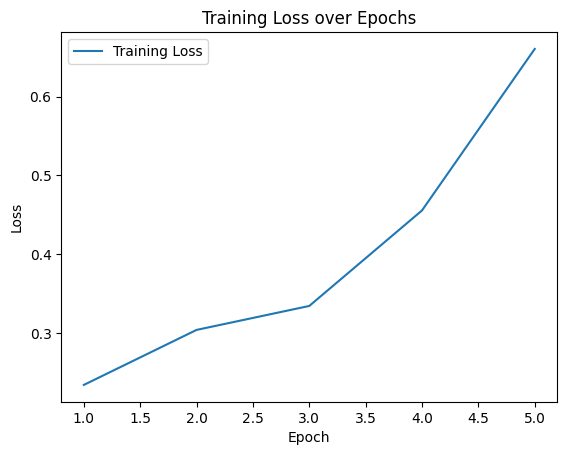

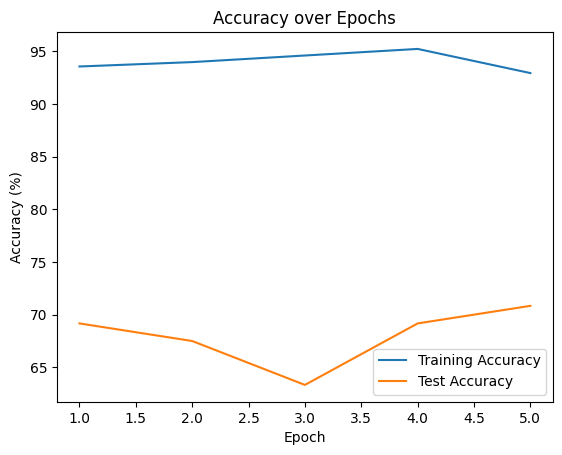

Итоговая точность на обучающем множестве: 92.92%
Итоговая точность на тестовом множестве: 70.83%
Время обучения: 3658.50 секунд


In [21]:
import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs + 1), train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.show()

plt.plot(range(1, num_epochs + 1), train_accuracies, label="Training Accuracy")
plt.plot(range(1, num_epochs + 1), test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

print(f"Итоговая точность на обучающем множестве: {train_accuracies[-1]:.2f}%")
print(f"Итоговая точность на тестовом множестве: {test_accuracies[-1]:.2f}%")
print(f"Время обучения: {training_time:.2f} секунд")

## Обратная связь
- [ ] Хочу получить обратную связь по решению